In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Y - Bankrupt?: Class label
# X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
# X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)
# X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
# X4 - Operating Gross Margin: Gross Profit/Net Sales
# X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales
# X6 - Operating Profit Rate: Operating Income/Net Sales
# X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
# X8 - After-tax net Interest Rate: Net Income/Net Sales
# X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
# X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
# X11 - Operating Expense Rate: Operating Expenses/Net Sales
# X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
# X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities
# X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity
# X15 - Tax rate (A): Effective Tax Rate
# X16 - Net Value Per Share (B): Book Value Per Share(B)
# X17 - Net Value Per Share (A): Book Value Per Share(A)
# X18 - Net Value Per Share (C): Book Value Per Share(C)
# X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
# X20 - Cash Flow Per Share
# X21 - Revenue Per Share (Yuan ¥): Sales Per Share
# X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share
# X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
# X24 - Realized Sales Gross Profit Growth Rate
# X25 - Operating Profit Growth Rate: Operating Income Growth
# X26 - After-tax Net Profit Growth Rate: Net Income Growth
# X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
# X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
# X29 - Total Asset Growth Rate: Total Asset Growth
# X30 - Net Value Growth Rate: Total Equity Growth
# X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
# X32 - Cash Reinvestment %: Cash Reinvestment Ratio
# X33 - Current Ratio
# X34 - Quick Ratio: Acid Test
# X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
# X36 - Total debt/Total net worth: Total Liability/Equity Ratio
# X37 - Debt ratio %: Liability/Total Assets
# X38 - Net worth/Assets: Equity/Total Assets
# X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
# X40 - Borrowing dependency: Cost of Interest-bearing Debt
# X41 - Contingent liabilities/Net worth: Contingent Liability/Equity
# X42 - Operating profit/Paid-in capital: Operating Income/Capital
# X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital
# X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
# X45 - Total Asset Turnover
# X46 - Accounts Receivable Turnover
# X47 - Average Collection Days: Days Receivable Outstanding
# X48 - Inventory Turnover Rate (times)
# X49 - Fixed Assets Turnover Frequency
# X50 - Net Worth Turnover Rate (times): Equity Turnover
# X51 - Revenue per person: Sales Per Employee
# X52 - Operating profit per person: Operation Income Per Employee
# X53 - Allocation rate per person: Fixed Assets Per Employee
# X54 - Working Capital to Total Assets
# X55 - Quick Assets/Total Assets
# X56 - Current Assets/Total Assets
# X57 - Cash/Total Assets
# X58 - Quick Assets/Current Liability
# X59 - Cash/Current Liability
# X60 - Current Liability to Assets
# X61 - Operating Funds to Liability
# X62 - Inventory/Working Capital
# X63 - Inventory/Current Liability
# X64 - Current Liabilities/Liability
# X65 - Working Capital/Equity
# X66 - Current Liabilities/Equity
# X67 - Long-term Liability to Current Assets
# X68 - Retained Earnings to Total Assets
# X69 - Total income/Total expense
# X70 - Total expense/Assets
# X71 - Current Asset Turnover Rate: Current Assets to Sales
# X72 - Quick Asset Turnover Rate: Quick Assets to Sales
# X73 - Working capitcal Turnover Rate: Working Capital to Sales
# X74 - Cash Turnover Rate: Cash to Sales
# X75 - Cash Flow to Sales
# X76 - Fixed Assets to Assets
# X77 - Current Liability to Liability
# X78 - Current Liability to Equity
# X79 - Equity to Long-term Liability
# X80 - Cash Flow to Total Assets
# X81 - Cash Flow to Liability
# X82 - CFO to Assets
# X83 - Cash Flow to Equity
# X84 - Current Liability to Current Assets
# X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
# X86 - Net Income to Total Assets
# X87 - Total assets to GNP price
# X88 - No-credit Interval
# X89 - Gross Profit to Sales
# X90 - Net Income to Stockholder's Equity
# X91 - Liability to Equity
# X92 - Degree of Financial Leverage (DFL)
# X93 - Interest Coverage Ratio (Interest expense to EBIT)
# X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
# X95 - Equity to Liability

In [17]:
# Import Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#----------------------------------------------------
#reading data
data = pd.read_csv('Company_Bankruptcy.csv')

#data.describe()
data.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [19]:
# !pip install -U klib


In [20]:

import klib
import pandas as pd

df = pd.DataFrame(data)


In [21]:
klib.clean_column_names

<function klib.clean.clean_column_names>

In [22]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [23]:
def count_unique_values(data):
    
    total = data.count()
    temp = pd.DataFrame(total)
    temp.columns = ['Total']            # Count total number of non-null values
    
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()    # Get unique values for each column
        uniques.append(unique)
    temp['Uniques'] = uniques
    
    return(np.transpose(temp))
count_unique_values(data)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Total,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,...,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819
Uniques,2,3333,3151,3160,3781,3788,3376,3789,3604,2551,...,6819,6818,6819,6816,6819,6819,6240,6240,1,6819


In [24]:
print(data.duplicated().sum())
#### delete duplicate rows
data.drop_duplicates(inplace=True)

0


In [25]:
# delete columns that have 1 value
def remove_constant_value_features(data):
    return [e for e in data.columns if data[e].nunique() == 1]
drop_col = remove_constant_value_features(data)
print(drop_col)

[' Net Income Flag']


In [26]:
# remove colmuns that have all deffrent vallues
def remove_distinct_value_features(data):
    return [e for e in data.columns if data[e].nunique() == data.shape[0]]
drop_col = remove_distinct_value_features(data)
print(drop_col)

[' Working Capital to Total Assets', ' Quick Assets/Total Assets', ' Current Assets/Total Assets', ' Cash/Total Assets', ' Quick Assets/Current Liability', ' Current Liability to Assets', ' Operating Funds to Liability', ' Working Capital/Equity', ' Current Liabilities/Equity', ' Retained Earnings to Total Assets', ' Total income/Total expense', ' Total expense/Assets', ' Working capitcal Turnover Rate', ' Cash Flow to Sales', ' Current Liability to Equity', ' Cash Flow to Total Assets', ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity', ' Current Liability to Current Assets', ' Net Income to Total Assets', ' No-credit Interval', " Net Income to Stockholder's Equity", ' Liability to Equity', ' Equity to Liability']


In [27]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [28]:
klib.corr_mat(data)

In [29]:
## we well use this cols that have high corr
data = pd.read_csv('Company_Bankruptcy.csv',usecols=['Bankrupt?', ' Net profit before tax/Paid-in capital', ' Persistent EPS in the Last Four Seasons', " Interest-bearing debt interest rate", " Total debt/Total net worth", " Fixed Assets Turnover Frequency", " Cash/Total Assets", " Equity to Liability"])


In [30]:
data.rename(columns = {'Bankrupt?' : 'Bankrupt' } , inplace = True)


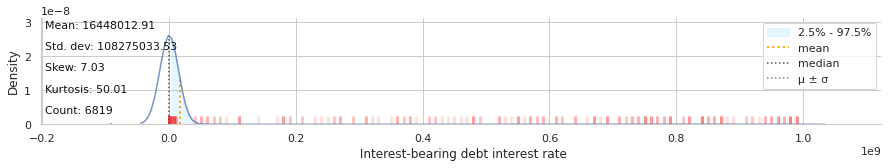

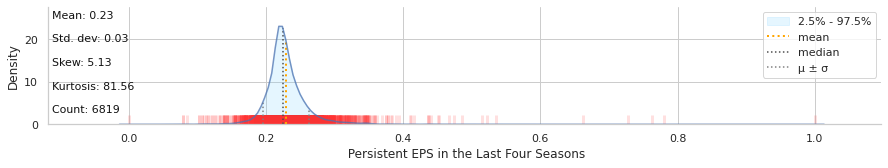

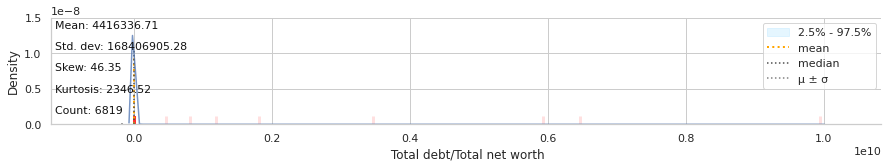

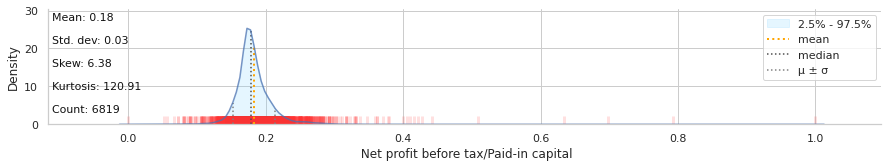

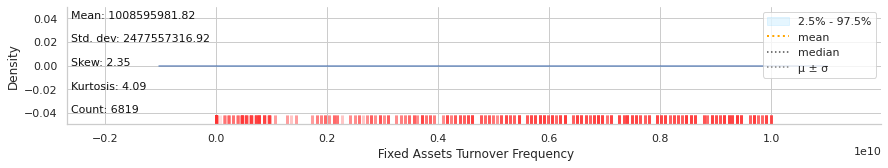

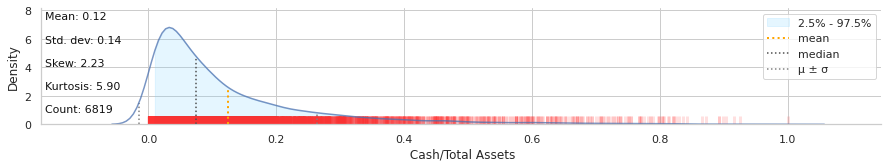

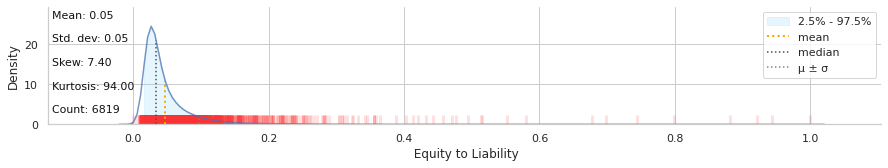

In [31]:
klib.dist_plot(data)

In [33]:
#Finding Categorical Featurs
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'category' ]
print(categorical_features )

[]


In [34]:
#missing data 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Bankrupt,0,0.0
Interest-bearing debt interest rate,0,0.0
Persistent EPS in the Last Four Seasons,0,0.0
Total debt/Total net worth,0,0.0
Net profit before tax/Paid-in capital,0,0.0
Fixed Assets Turnover Frequency,0,0.0
Cash/Total Assets,0,0.0
Equity to Liability,0,0.0


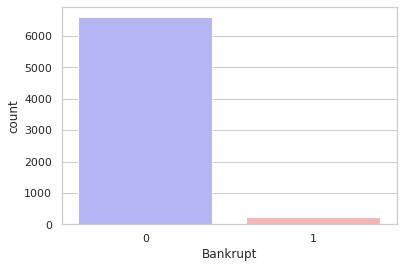

Bankrupt
0    6599
1     220
dtype: int64

In [35]:
sns.countplot(data=data, x='Bankrupt', palette='bwr')
plt.show()

data.groupby('Bankrupt').size()


We have highly unbalanced data
**bold text**

In [36]:
#X Data
X = data.drop(['Bankrupt'], axis=1, inplace=False)
#print('X Data is \n' , X.head())
#print('X shape is ' , X.shape)

#y Data
y = data['Bankrupt']
#print('y Data is \n' , y.head())
#print('y shape is ' , y.shape)

#----------------------------------------------------
#Standard Scaler for Data#X Data
X = data.drop(['Bankrupt'], axis=1, inplace=False)
#print('X Data is \n' , X.head())
#print('X shape is ' , X.shape)

#y Data
y = data['Bankrupt']
#print('y Data is \n' , y.head())
#print('y shape is ' , y.shape)



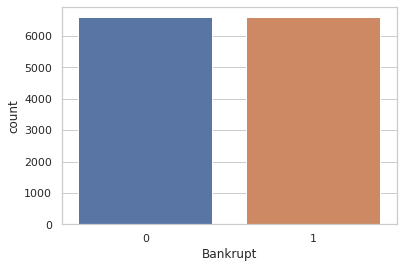

In [37]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)
sns.countplot(x=y)


In [38]:





scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

#showing data
#print('X \n' , X[:10])
#print('y \n' , y[:10])

#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
#print('X_train shape is ' , X_train.shape)
#print('X_test shape is ' , X_test.shape)
#print('y_train shape is ' , y_train.shape)
#print('y_test shape is ' , y_test.shape)

{'KNN': 0.9336547291092746, 'Logistic Regression': 0.8700642791551882, 'Random Forest': 0.9428374655647382, 'DecisionTree': 0.9139118457300276, 'SVC': 0.8937098255280074, 'GaussianNB': 0.703168044077135, 'GradientBoosting': 0.9051882460973371}


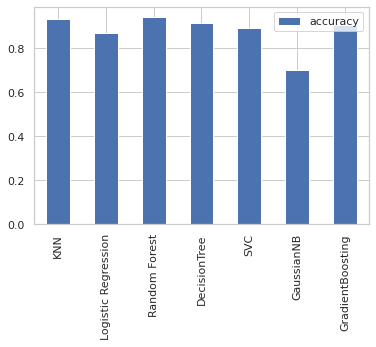

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "DecisionTree" :  DecisionTreeClassifier(),
          "SVC"          : SVC(),
          "GaussianNB"   : GaussianNB(),
          "GradientBoosting": GradientBoostingClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(44)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
print(np.array(model_scores))

#Model Comparison
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [40]:
#Import Libraries
from sklearn.neighbors import KNeighborsClassifier
#----------------------------------------------------

#----------------------------------------------------
#Applying KNeighborsClassifier Model 

'''
sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform’, algorithm=’auto’, leaf_size=30,
                                       p=2, metric='minkowski’, metric_params=None,n_jobs=None)
'''

KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(X_train, y_train)

#Calculating Details
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = KNNClassifierModel.predict(X_test)
y_pred_prob = KNNClassifierModel.predict_proba(X_test)
print('Prediction Probabilities Value for KNNClassifierModel is : ' , y_pred_prob[30:60])

KNNClassifierModel Train Score is :  0.9471838950463696
KNNClassifierModel Test Score is :  0.9336547291092746
Prediction Probabilities Value for KNNClassifierModel is :  [[0.4 0.6]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.2 0.8]
 [1.  0. ]
 [0.6 0.4]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 [0.  1. ]
 [0.4 0.6]
 [0.  1. ]
 [0.8 0.2]
 [0.  1. ]
 [0.6 0.4]
 [0.  1. ]
 [1.  0. ]
 [0.6 0.4]
 [1.  0. ]]


In [41]:
print("The Real Value Is    :",np.array(y_test[30:60]))
print("The Predect Value Is :" ,y_pred[30:60])

The Real Value Is    : [0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0]
The Predect Value Is : [1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2169
           1       0.90      0.98      0.94      2187

    accuracy                           0.93      4356
   macro avg       0.94      0.93      0.93      4356
weighted avg       0.94      0.93      0.93      4356



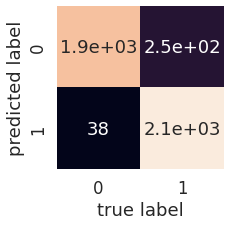

In [43]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)


In [44]:
#Import Libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#----------------------------------------------------

#----------------------------------------------------
#Calculating Area Under the Curve :  

fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

AUC Value  :  0.9334515346246303
